In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.cluster import KMeans
from scipy.stats import skew
import warnings
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift
from pandas_profiling import ProfileReport


ModuleNotFoundError: No module named 'sklearn_extra'

In [ ]:
data_diterima = pd.read_excel ('__DATA COVID 2020.xlsx')
data_diterima#tampilkan data diterima dari dinas 

NOMOR            NAMA_PASIEN  UMUR JENIS_KELAMIN         Tangga_Lahir  \
0         1      ANDI SULANJANI ST  40.0             L                  NaN   
1         2  Dra. Hj. Neni Hernani  65.0             P                  NaN   
2         3        AI UUH MUHLASIH  35.0             P                  NaN   
3         4      Ardhi Ardhiansyah  40.0             L                  NaN   
4         5         Teddy Susianto  47.0             L                  NaN   
...     ...                    ...   ...           ...                  ...   
2143   2195               NURJANAH  54.0             P  1966-04-07 00:00:00   
2144   2196        NOVIA OKTAVIANI  23.0             P  1997-10-25 00:00:00   
2145   2197          YEYET SUHAETI  41.0             P  1979-01-28 00:00:00   
2146   2198     DEWI SITI PURWANTI  24.0             P           1996-08-26   
2147   2199           NOVA ALMAISA  33.0             P           1987-11-12   

                                                 ALAMAT     KELURAHAN  \
0     Jl. Taman Pahlawan RT 02 RW 01 Kel. Cikalang K...      CIKALANG   
1     Jl. Sukagalih No. 16 RT 03 RW 10 Kel. Lengkong...  LENGKONGSARI   
2     Gunung Siman RT 03 RW 06 Kel. Cigantang Kec. M...     CIGANTANG   
3     Jl. Tentara Pelajar No.74 Rt 04 Rw 08, Empangs...    EMPANGSARI   
4     Jl. RSUD No1 .RT 02 RW 012 , Empangsari, Tawan...    EMPANGSARI   
...                                                 ...           ...   
2143                      JL LASWI KEMUNING RT 01 RW 05     CIKALANG    
2144                      JL LASWI KEMUNING RT 01 RW 05     CIKALANG    
2145                           JL WINAJAYA 2 NO 25 2/10     KAHURIPAN   
2146                            KAPTEN HAJI DIDI EFENDI    EMPANGSARI   
2147                               JL. PGRI BARAT NO.14  LENGKONGSARI   

       KECAMATAN                 TEMPAT_RAWAT TANGGAL_REGISTRASI  \
0         TAWANG                      Rs. JK                 NaT   
1         TAWANG           Rs. JK (Pemulihan)                NaT   
2     MANGKUBUMI  Rs. JK (Rapid Test Positif)                NaT   
3         TAWANG             Rs. TMC (Sembuh)                NaT   
4         TAWANG                      Rs. TMC                NaT   
...          ...                          ...                ...   
2143      TAWANG                          NaN         2020-12-31   
2144      TAWANG                          NaN         2020-12-31   
2145     TAWANG                           NaN         2020-12-31   
2146      TAWANG                          NaN         2020-12-31   
2147      TAWANG                          NaN         2020-12-31   

     TANGGAL_POSITIF TANGGAL_SEMBUH TANGGAL_MENINGGAL         KETERANGAN  \
0         2020-03-24     2020-04-16               NaT                NaN   
1         2020-03-24     2020-04-16               NaT                NaN   
2         2020-03-25     2020-04-11               NaT                NaN   
3         2020-04-02     2020-06-01               NaT                NaN   
4         2020-04-02     2020-06-01               NaT                NaN   
...              ...            ...               ...                ...   
2143      2020-12-31     2021-01-14               NaT   KONTAK ERAT NOPI   
2144      2020-12-31     2021-01-14               NaT        NON CLUSTER   
2145      2020-12-31     2021-01-14               NaT  KONTAK ERAT RINI    
2146      2020-12-31     2021-01-14               NaT                NaN   
2147      2020-12-31     2021-01-14               NaT                NaN   

      simptomatik  Asimptomatik  
0             NaN           NaN  
1             NaN           NaN  
2             NaN           NaN  
3             NaN           NaN  
4             NaN           NaN  
...           ...           ...  
2143          1.0           NaN  
2144          1.0           NaN  
2145          1.0           NaN  
2146          1.0           NaN  
2147          NaN           1.0  

[2148 rows x 16 columns]

In [ ]:
df = pd.read_excel ('__DATA_COVID_2020_v1B.xlsx')
df.head(20)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UMUR             2147 non-null   float64       
 1   JENIS_KELAMIN    2147 non-null   int64         
 2   KELURAHAN        2147 non-null   object        
 3   TANGGAL_POSITIF  2147 non-null   datetime64[ns]
 4   TANGGAL_SEMBUH   2147 non-null   datetime64[ns]
 5   simptomatik      2147 non-null   bool          
 6   Asimptomatik     2147 non-null   bool          
 7   Kode Kelurahan   2147 non-null   int64         
 8   Latitude         2147 non-null   int64         
 9   Longitude        2147 non-null   int64         
dtypes: bool(2), datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 138.5+ KB
None


In [ ]:
df.dropna()

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  
0           False         False               0  -7326224  108200223  
1           False         False               0  -7326224  108200223  
2           False         False               0  -7326224  108200223  
3           False         False               0  -7326224  108200223  
4           False          True               0  -7326224  108200223  
...           ...           ...             ...       ...        ...  
2142        False         False              23  -7332715  108212523  
2143         True         False              23  -7332715  108212523  
2144         True         False              23  -7332715  108212523  
2145        False         False              23  -7332715  108212523  
2146         True         False              23  -7332715  108212523  

[2147 rows x 10 columns]

In [ ]:
df['simptomatik'].replace({True:1,False:0},inplace=True)
df['simptomatik'].map({True: 1, False: 0})  
df['Asimptomatik'].replace({True:1,False:0},inplace=True)
df

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  
0               0             0               0  -7326224  108200223  
1               0             0               0  -7326224  108200223  
2               0             0               0  -7326224  108200223  
3               0             0               0  -7326224  108200223  
4               0             1               0  -7326224  108200223  
...           ...           ...             ...       ...        ...  
2142            0             0              23  -7332715  108212523  
2143            1             0              23  -7332715  108212523  
2144            1             0              23  -7332715  108212523  
2145            0             0              23  -7332715  108212523  
2146            1             0              23  -7332715  108212523  

[2147 rows x 10 columns]

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UMUR             2147 non-null   float64       
 1   JENIS_KELAMIN    2147 non-null   int64         
 2   KELURAHAN        2147 non-null   object        
 3   TANGGAL_POSITIF  2147 non-null   datetime64[ns]
 4   TANGGAL_SEMBUH   2147 non-null   datetime64[ns]
 5   simptomatik      2147 non-null   int64         
 6   Asimptomatik     2147 non-null   int64         
 7   Kode Kelurahan   2147 non-null   int64         
 8   Latitude         2147 non-null   int64         
 9   Longitude        2147 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(1)
memory usage: 167.9+ KB


In [ ]:
df['BULAN_POSITIF'] = pd.DatetimeIndex(df['TANGGAL_POSITIF']).month
df['Tanggal_POSITIF'] = pd.DatetimeIndex(df['TANGGAL_POSITIF']).day
df['BULAN_SEMBUH'] = pd.DatetimeIndex(df['TANGGAL_SEMBUH']).month
df['Tanggal_SEMBUH'] = pd.DatetimeIndex(df['TANGGAL_SEMBUH']).day
#df['BULAN_REGISTRASI'] = pd.DatetimeIndex(df['TANGGAL_REGISTRASI']).month
#df['TAHUN_REGISTRASI'] = pd.DatetimeIndex(df['TANGGAL_REGISTRASI']).year
df

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  \
0               0             0               0  -7326224  108200223   
1               0             0               0  -7326224  108200223   
2               0             0               0  -7326224  108200223   
3               0             0               0  -7326224  108200223   
4               0             1               0  -7326224  108200223   
...           ...           ...             ...       ...        ...   
2142            0             0              23  -7332715  108212523   
2143            1             0              23  -7332715  108212523   
2144            1             0              23  -7332715  108212523   
2145            0             0              23  -7332715  108212523   
2146            1             0              23  -7332715  108212523   

      BULAN_POSITIF  Tanggal_POSITIF  BULAN_SEMBUH  Tanggal_SEMBUH  
0                 8               18             9              14  
1                 8               18             9               7  
2                10               11            11              17  
3                10               15            11              17  
4                10               26            12              18  
...             ...              ...           ...             ...  
2142              9               10            10               6  
2143             11               25            12              20  
2144             12                1            12              24  
2145             12                3            12              25  
2146             12               13            12              27  

[2147 rows x 14 columns]

In [ ]:
df.fillna(0)

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  \
0               0             0               0  -7326224  108200223   
1               0             0               0  -7326224  108200223   
2               0             0               0  -7326224  108200223   
3               0             0               0  -7326224  108200223   
4               0             1               0  -7326224  108200223   
...           ...           ...             ...       ...        ...   
2142            0             0              23  -7332715  108212523   
2143            1             0              23  -7332715  108212523   
2144            1             0              23  -7332715  108212523   
2145            0             0              23  -7332715  108212523   
2146            1             0              23  -7332715  108212523   

      BULAN_POSITIF  Tanggal_POSITIF  BULAN_SEMBUH  Tanggal_SEMBUH  
0                 8               18             9              14  
1                 8               18             9               7  
2                10               11            11              17  
3                10               15            11              17  
4                10               26            12              18  
...             ...              ...           ...             ...  
2142              9               10            10               6  
2143             11               25            12              20  
2144             12                1            12              24  
2145             12                3            12              25  
2146             12               13            12              27  

[2147 rows x 14 columns]

In [ ]:
df1=df.copy()

In [ ]:
df1=df1.drop(['TANGGAL_POSITIF','TANGGAL_SEMBUH'], axis = 1)#hapus kolom
df1#tampilkan before

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2142  43.0              1  YUDANAGARA            0             0   
2143  30.0              1  YUDANAGARA            1             0   
2144  56.0              1  YUDANAGARA            1             0   
2145  30.0              0  YUDANAGARA            0             0   
2146  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2142              23  -7332715  108212523              9               10   
2143              23  -7332715  108212523             11               25   
2144              23  -7332715  108212523             12                1   
2145              23  -7332715  108212523             12                3   
2146              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  
0                9              14  
1                9               7  
2               11              17  
3               11              17  
4               12              18  
...            ...             ...  
2142            10               6  
2143            12              20  
2144            12              24  
2145            12              25  
2146            12              27  

[2147 rows x 12 columns]

C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_20232\471573778.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, fmt='.2g');


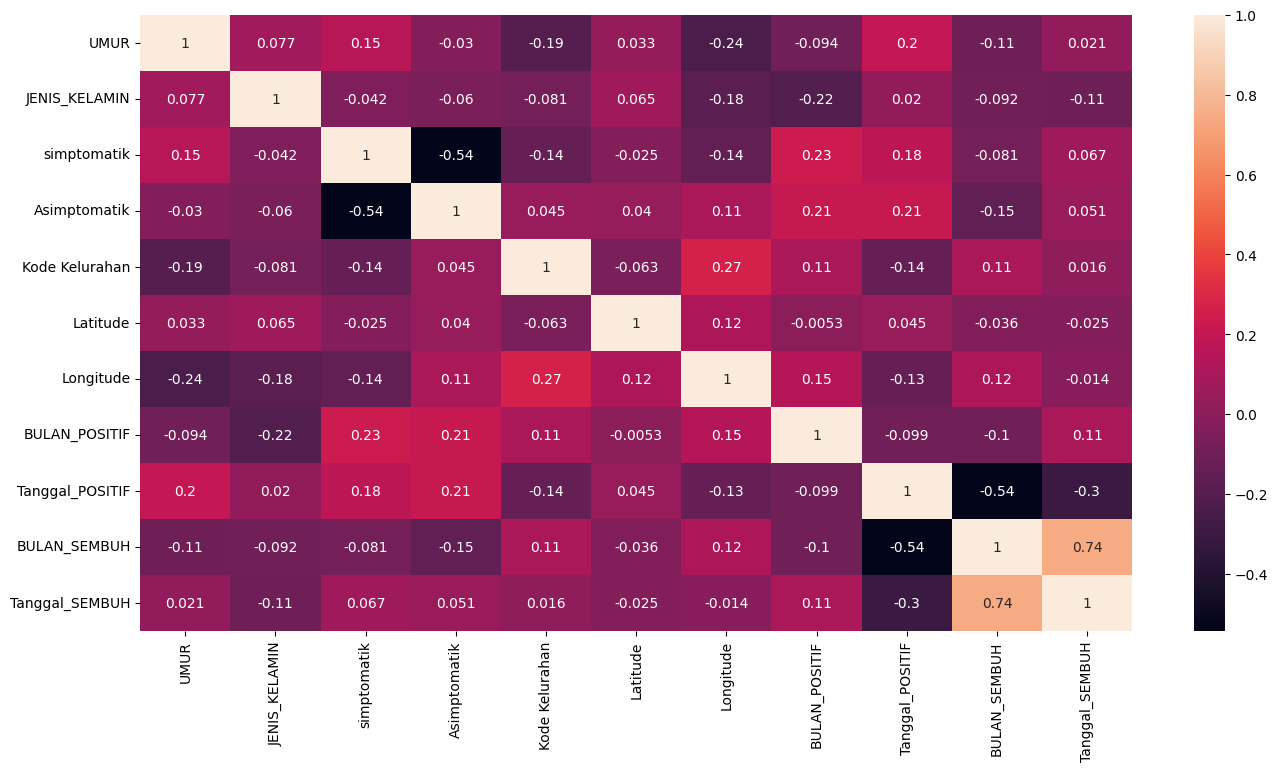

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df1.corr(), annot=True, fmt='.2g');

In [ ]:
df1.describe()

UMUR  JENIS_KELAMIN  simptomatik  Asimptomatik  Kode Kelurahan  \
count  2147.000000    2147.000000  2147.000000   2147.000000     2147.000000   
mean     32.028562       0.398230     0.326036      0.386586       42.933861   
std      17.628468       0.489647     0.468870      0.487081       19.569322   
min       0.200000       0.000000     0.000000      0.000000        0.000000   
25%      17.000000       0.000000     0.000000      0.000000       28.000000   
50%      28.000000       0.000000     0.000000      0.000000       50.000000   
75%      46.000000       1.000000     1.000000      1.000000       56.000000   
max     123.000000       1.000000     1.000000      1.000000       93.000000   

           Latitude     Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
count  2.147000e+03  2.147000e+03    2147.000000      2147.000000   
mean  -7.349271e+06  1.082222e+08      11.318584        14.997671   
std    4.035206e+04  2.984434e+04       1.258353         8.638084   
min   -7.614470e+06  1.080723e+08       3.000000         1.000000   
25%   -7.357527e+06  1.082030e+08      11.000000         9.000000   
50%   -7.355125e+06  1.082230e+08      12.000000        14.000000   
75%   -7.331360e+06  1.082529e+08      12.000000        23.000000   
max   -7.173330e+06  1.082814e+08      12.000000        31.000000   

       BULAN_SEMBUH  Tanggal_SEMBUH  
count   2147.000000     2147.000000  
mean       8.969259       17.984164  
std        4.541820        9.178652  
min        1.000000        1.000000  
25%        7.000000       13.000000  
50%       12.000000       16.000000  
75%       12.000000       27.000000  
max       12.000000       31.000000

In [ ]:
#df['JENIS_KELAMIN'] = df['JENIS_KELAMIN'].astype(int)
#df['simptomatik'] = df['simptomatik'].astype(int)
#df['Asimptomatik'] = df['Asimptomatik'].astype(int)
"""
df['KODE_KELURAHAN'] = df['KODE_KELURAHAN'].astype(int)
df['BULAN_POSITIF'] = df['BULAN_POSITIF'].astype(int)
df['TAHUN_POSITIF'] = df['TAHUN_POSITIF'].astype(int)
df['BULAN_SEMBUH'] = df['BULAN_SEMBUH'].astype(int)
df['TAHUN_SEMBUH'] = df['TAHUN_SEMBUH'].astype(int)
df['BULAN_REGISTRASI'] = df['BULAN_REGISTRASI'].astype(int)
df['TAHUN_REGISTRASI'] = df['TAHUN_REGISTRASI'].astype(int)"""

"\ndf['KODE_KELURAHAN'] = df['KODE_KELURAHAN'].astype(int)\ndf['BULAN_POSITIF'] = df['BULAN_POSITIF'].astype(int)\ndf['TAHUN_POSITIF'] = df['TAHUN_POSITIF'].astype(int)\ndf['BULAN_SEMBUH'] = df['BULAN_SEMBUH'].astype(int)\ndf['TAHUN_SEMBUH'] = df['TAHUN_SEMBUH'].astype(int)\ndf['BULAN_REGISTRASI'] = df['BULAN_REGISTRASI'].astype(int)\ndf['TAHUN_REGISTRASI'] = df['TAHUN_REGISTRASI'].astype(int)"

In [ ]:
def remove_outlier(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~(df>(Q1-(1.5*IQR)))|(df<(Q3+(1.5*IQR)))]
    return df_final
for x in range(2):
    df1=remove_outlier(df1)
    df1.dropna(axis=0,inplace=True)
    
#Tambah code ini

C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_20232\1121507375.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_20232\1121507375.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)
C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_20232\1121507375.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~(df>(Q1-(1.5*IQR)))|(df<(Q3+(1.5*IQR)))]


sns.boxplot(x='UMUR',data=df1)#cek data pencilan boxplot
plt.show()
sns.boxplot(x='JENIS_KELAMIN',data=df1)#cek data pencilan boxplot
plt.show()
sns.boxplot(x='BULAN_SEMBUH',data=df1)#cek data pencilan boxplot
plt.show()
sns.boxplot(x='BULAN_POSITIF',data=df1)#cek data pencilan boxplot
plt.show()
sns.boxplot(x='Asimptomatik',data=df1)#cek data pencilan boxplot
plt.show()
sns.boxplot(x='simptomatik',data=df1)#cek data pencilan boxplot
plt.show()

In [ ]:
df1.to_excel("data_covid_bersih.xlsx",index=False) #Tambah code ini

In [ ]:
terbaru = pd.read_excel ('data_covid_bersih.xlsx')#Tambah code ini

In [ ]:
terbaru2=terbaru.copy()
terbaru#tampikan after


UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2063  43.0              1  YUDANAGARA            0             0   
2064  30.0              1  YUDANAGARA            1             0   
2065  56.0              1  YUDANAGARA            1             0   
2066  30.0              0  YUDANAGARA            0             0   
2067  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2063              23  -7332715  108212523              9               10   
2064              23  -7332715  108212523             11               25   
2065              23  -7332715  108212523             12                1   
2066              23  -7332715  108212523             12                3   
2067              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  
0                9              14  
1                9               7  
2               11              17  
3               11              17  
4               12              18  
...            ...             ...  
2063            10               6  
2064            12              20  
2065            12              24  
2066            12              25  
2067            12              27  

[2068 rows x 12 columns]

In [ ]:
df2=df1.copy()
df2#Tambah code ini

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2142  43.0              1  YUDANAGARA            0             0   
2143  30.0              1  YUDANAGARA            1             0   
2144  56.0              1  YUDANAGARA            1             0   
2145  30.0              0  YUDANAGARA            0             0   
2146  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan   Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0 -7326224.0  108200223              8               18   
1                  0 -7326224.0  108200223              8               18   
2                  0 -7326224.0  108200223             10               11   
3                  0 -7326224.0  108200223             10               15   
4                  0 -7326224.0  108200223             10               26   
...              ...        ...        ...            ...              ...   
2142              23 -7332715.0  108212523              9               10   
2143              23 -7332715.0  108212523             11               25   
2144              23 -7332715.0  108212523             12                1   
2145              23 -7332715.0  108212523             12                3   
2146              23 -7332715.0  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  
0                9              14  
1                9               7  
2               11              17  
3               11              17  
4               12              18  
...            ...             ...  
2142            10               6  
2143            12              20  
2144            12              24  
2145            12              25  
2146            12              27  

[2068 rows x 12 columns]

In [ ]:
df5= pd.read_excel ('K-Means.xlsx')
#Tambah code ini

In [ ]:
#df2.drop(['Latitude','Longitude','KELURAHAN'], axis = 1)#hapus kolom
#df5.drop(['Latitude','Longitude','KELURAHAN','simptomatik','Asimptomatik'],axis=1, inplace=True)
df5.drop(['simptomatik','Asimptomatik','Tanggal_POSITIF','Tanggal_SEMBUH'],axis=1, inplace=True)
df5
#Tambah code ini

UMUR  JENIS_KELAMIN  Kode Kelurahan  BULAN_POSITIF  BULAN_SEMBUH  Gejala
0     52.0              0               0              8             9       0
1     68.0              1               0              8             9       0
2     17.0              0               0             10            11       0
3     56.0              0               0             10            11       0
4     50.0              0               0             10            12       2
...    ...            ...             ...            ...           ...     ...
2063  43.0              1              23              9            10       0
2064  30.0              1              23             11            12       1
2065  56.0              1              23             12            12       1
2066  30.0              0              23             12            12       0
2067  40.0              1              23             12            12       1

[2068 rows x 6 columns]

In [ ]:
df6=df5.copy()#Tambah code ini

In [ ]:
#df2.to_excel("azril_K_means.xlsx",index=False)

In [ ]:
df5["UMUR"] = (df5["UMUR"] - df5["UMUR"].min()) / (df5["UMUR"].max() -df5["UMUR"].min())
df5["JENIS_KELAMIN"] = (df5["JENIS_KELAMIN"] - df5["JENIS_KELAMIN"].min()) / (df5["JENIS_KELAMIN"].max() - df5["JENIS_KELAMIN"].min())
# df2["simptomatik"] = (df2["simptomatik"] - df2["simptomatik"].min()) / (df2["simptomatik"].max() - df2["simptomatik"].min())
# df2["Asimptomatik"] = (df2["Asimptomatik"] - df2["Asimptomatik"].min()) / (df2["Asimptomatik"].max() - df2["Asimptomatik"].min())
df5["Kode Kelurahan"] = (df5["Kode Kelurahan"] - df5["Kode Kelurahan"].min()) / (df5["Kode Kelurahan"].max() - df5["Kode Kelurahan"].min())
df5["BULAN_POSITIF"] = (df5["BULAN_POSITIF"] - df5["BULAN_POSITIF"].min()) / (df5["BULAN_POSITIF"].max() - df5["BULAN_POSITIF"].min())
#df5["Tanggal_POSITIF"] = (df5["Tanggal_POSITIF"] - df5["Tanggal_POSITIF"].min()) / (df5["Tanggal_POSITIF"].max() - df5["Tanggal_POSITIF"].min())
df5["BULAN_SEMBUH"] = (df5["BULAN_SEMBUH"] - df5["BULAN_SEMBUH"].min()) / (df5["BULAN_SEMBUH"].max() - df5["BULAN_SEMBUH"].min())
#df5["Tanggal_SEMBUH"] = (df5["Tanggal_SEMBUH"] - df5["Tanggal_SEMBUH"].min()) / (df5["Tanggal_SEMBUH"].max() - df5["Tanggal_SEMBUH"].min())
df5["Gejala"] = (df5["Gejala"] - df5["Gejala"].min()) / (df5["Gejala"].max() - df5["Gejala"].min())

#Tambah code ini

In [ ]:
df5

UMUR  JENIS_KELAMIN  Kode Kelurahan  BULAN_POSITIF  BULAN_SEMBUH  \
0     0.583333            0.0            0.00       0.555556      0.727273   
1     0.763514            1.0            0.00       0.555556      0.727273   
2     0.189189            0.0            0.00       0.777778      0.909091   
3     0.628378            0.0            0.00       0.777778      0.909091   
4     0.560811            0.0            0.00       0.777778      1.000000   
...        ...            ...             ...            ...           ...   
2063  0.481982            1.0            0.25       0.666667      0.818182   
2064  0.335586            1.0            0.25       0.888889      1.000000   
2065  0.628378            1.0            0.25       1.000000      1.000000   
2066  0.335586            0.0            0.25       1.000000      1.000000   
2067  0.448198            1.0            0.25       1.000000      1.000000   

        Gejala  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.666667  
...        ...  
2063  0.000000  
2064  0.333333  
2065  0.333333  
2066  0.000000  
2067  0.333333  

[2068 rows x 6 columns]

In [ ]:

sc = StandardScaler()
df_std = sc.fit_transform(df5)#Tambah code ini/ perbaiki
df_std

array([[ 1.17920768e+00, -8.07314801e-01, -2.18103396e+00,
        -2.61448556e+00,  2.13863603e-03, -1.33179420e+00],
       [ 2.10529526e+00,  1.23867418e+00, -2.18103396e+00,
        -2.61448556e+00,  2.13863603e-03, -1.33179420e+00],
       [-8.46608899e-01, -8.07314801e-01, -2.18103396e+00,
        -1.03540958e+00,  4.44408567e-01, -1.33179420e+00],
       ...,
       [ 1.41072958e+00,  1.23867418e+00, -9.93494475e-01,
         5.43666389e-01,  6.65543532e-01, -1.15296671e-01],
       [-9.41627401e-02, -8.07314801e-01, -9.93494475e-01,
         5.43666389e-01,  6.65543532e-01, -1.33179420e+00],
       [ 4.84641998e-01,  1.23867418e+00, -9.93494475e-01,
         5.43666389e-01,  6.65543532e-01, -1.15296671e-01]])

D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: F

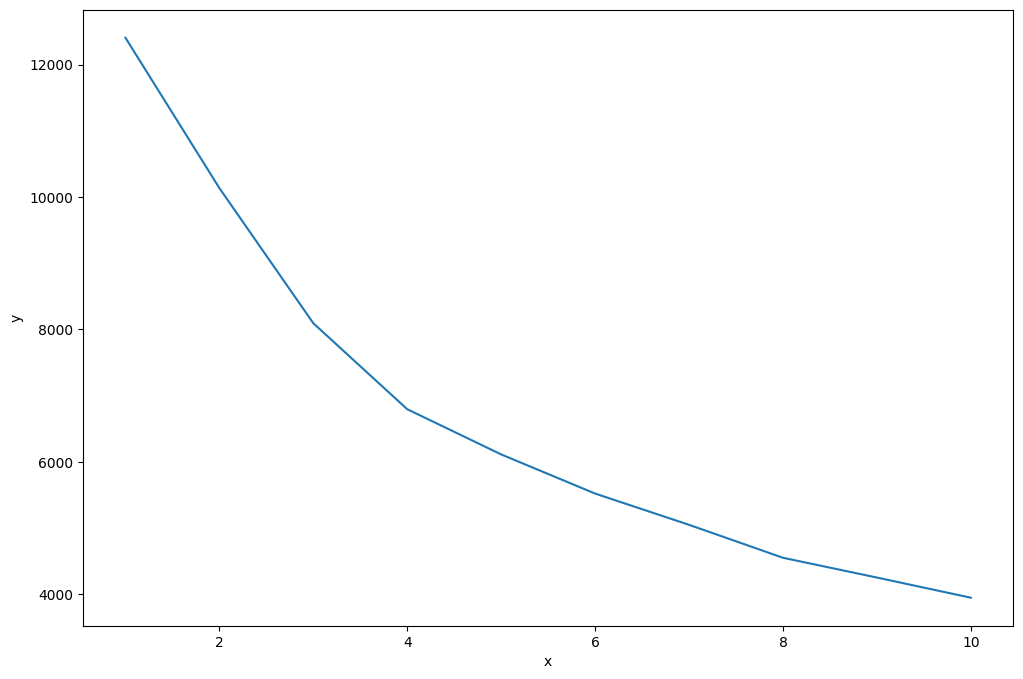

In [ ]:
#elbow methot
fig, ax = plt.subplots(figsize=(12,8))
wcss=[]
for i in range(1,11):#jumlah custer1-10
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=74)#wajib init='k-means++'
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
#gak perlu ditampilkan
plt.plot(range(1,11),wcss)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [ ]:
data = []
k_list = []
#silhouette_score
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(df_std)
    labels = kmeans.labels_
    data.append(silhouette_score(df5, labels, metric = 'euclidean'))
    k_list.append(k)
#gak perlu ditampilkan
plt.plot(k_list,data)
plt.show()
#gak perlu ditampilkan

D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: F

In [ ]:
kmeans1b = KMeans(n_clusters = 4, random_state=42).fit(df_std)#Tambah code ini atau perbaiki

D:\ML\New folder\Env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels1b = kmeans1b.labels_
terbaru['Hasil_KMeans']=labels1b
#Tambah code ini atau perbaiki

In [ ]:
terbaru['Gejala']=df6['Gejala']
terbaru['Gejala'] = terbaru['Gejala'].astype(int)
terbaru#Tambah code ini

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2063  43.0              1  YUDANAGARA            0             0   
2064  30.0              1  YUDANAGARA            1             0   
2065  56.0              1  YUDANAGARA            1             0   
2066  30.0              0  YUDANAGARA            0             0   
2067  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2063              23  -7332715  108212523              9               10   
2064              23  -7332715  108212523             11               25   
2065              23  -7332715  108212523             12                1   
2066              23  -7332715  108212523             12                3   
2067              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  Hasil_KMeans  Gejala  
0                9              14             1       0  
1                9               7             1       0  
2               11              17             1       0  
3               11              17             0       0  
4               12              18             0       2  
...            ...             ...           ...     ...  
2063            10               6             1       0  
2064            12              20             0       1  
2065            12              24             0       1  
2066            12              25             2       0  
2067            12              27             0       1  

[2068 rows x 14 columns]

In [ ]:
terbaru.to_excel("KMenasCovid.xlsx",index=False)#hasil download

In [ ]:
hasikmeas=pd.read_excel ('KMenasCovid.xlsx')
hasikmeas#tampilkan hasil kmeas

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2063  43.0              1  YUDANAGARA            0             0   
2064  30.0              1  YUDANAGARA            1             0   
2065  56.0              1  YUDANAGARA            1             0   
2066  30.0              0  YUDANAGARA            0             0   
2067  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2063              23  -7332715  108212523              9               10   
2064              23  -7332715  108212523             11               25   
2065              23  -7332715  108212523             12                1   
2066              23  -7332715  108212523             12                3   
2067              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  Hasil_KMeans  Gejala  
0                9              14             1       0  
1                9               7             1       0  
2               11              17             1       0  
3               11              17             0       0  
4               12              18             0       2  
...            ...             ...           ...     ...  
2063            10               6             1       0  
2064            12              20             0       1  
2065            12              24             0       1  
2066            12              25             2       0  
2067            12              27             0       1  

[2068 rows x 14 columns]

In [ ]:
profile = ProfileReport(terbaru, title="k means clustering ")

In [ ]:
profile.to_file("k_means_clustering.html")#hasil download

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.11it/s]


In [ ]:
terbaru2['Cluster']=labels1b
terbaru2['Gejala']=df6['Gejala']
terbaru2['Gejala'] = terbaru2['Gejala'].astype(int)
terbaru2

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2063  43.0              1  YUDANAGARA            0             0   
2064  30.0              1  YUDANAGARA            1             0   
2065  56.0              1  YUDANAGARA            1             0   
2066  30.0              0  YUDANAGARA            0             0   
2067  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2063              23  -7332715  108212523              9               10   
2064              23  -7332715  108212523             11               25   
2065              23  -7332715  108212523             12                1   
2066              23  -7332715  108212523             12                3   
2067              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  Cluster  Gejala  
0                9              14        1       0  
1                9               7        1       0  
2               11              17        1       0  
3               11              17        0       0  
4               12              18        0       2  
...            ...             ...      ...     ...  
2063            10               6        1       0  
2064            12              20        0       1  
2065            12              24        0       1  
2066            12              25        2       0  
2067            12              27        0       1  

[2068 rows x 14 columns]

In [ ]:
cluster0 = terbaru2[terbaru2['Cluster'] == 0]
cluster1 = terbaru2[terbaru2['Cluster'] == 1]
cluster2 = terbaru2[terbaru2['Cluster'] == 2]
cluster3 = terbaru2[terbaru2['Cluster'] == 3]
#cluster4 = terbaru2[terbaru2['Cluster'] == 4]
# cluster5 = terbaru2[terbaru2['Cluster'] == 5]
# cluster6 = terbaru2[terbaru2['Cluster'] == 6]
# cluster7 = terbaru2[terbaru2['Cluster'] == 7]
cluster0.to_excel("k_means0.xlsx")#hasil download
cluster1.to_excel("k_means1.xlsx")#hasil download
cluster2.to_excel("k_means2.xlsx")#hasil download
cluster3.to_excel("k_means3.xlsx")#hasil download
#cluster4.to_excel("k_means4.xlsx")#hasil download
# cluster5.to_excel("k_means5.xlsx")#hasil download
# cluster6.to_excel("k_means6.xlsx")#hasil download
# cluster7.to_excel("k_means7.xlsx")#hasil download
#Tambah code ini atau perbaiki

In [ ]:
classter0 = pd.read_excel('k_means0.xlsx')
classter1 = pd.read_excel('k_means1.xlsx')
classter2 = pd.read_excel('k_means2.xlsx')
classter3 = pd.read_excel('k_means3.xlsx')
#classter4 = pd.read_excel('k_means4.xlsx')
# classter5 = pd.read_excel('k_means5.xlsx')
# classter6 = pd.read_excel('k_means6.xlsx')
# classter7 = pd.read_excel('k_means7.xlsx')
#Tambah code ini atau perbaiki

In [ ]:
classter0#tampilkan

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0             3  56.0              0    ARGASARI            0             0   
1             4  50.0              0    ARGASARI            0             1   
2             5  49.0              0    ARGASARI            0             0   
3             6  74.0              1    ARGASARI            0             1   
4             7  53.0              1    ARGASARI            1             0   
..          ...   ...            ...         ...          ...           ...   
563        2036  71.0              0    TUGURAJA            0             1   
564        2039  38.0              1    TUGURAJA            0             1   
565        2064  30.0              1  YUDANAGARA            1             0   
566        2065  56.0              1  YUDANAGARA            1             0   
567        2067  40.0              1  YUDANAGARA            1             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 0  -7326224  108200223             10               15   
1                 0  -7326224  108200223             10               26   
2                 0  -7326224  108200223             11               12   
3                 0  -7326224  108200223             11               25   
4                 0  -7326224  108200223             11               28   
..              ...       ...        ...            ...              ...   
563              50  -7341184  108203024             12               14   
564              50  -7341184  108203024             12               14   
565              23  -7332715  108212523             11               25   
566              23  -7332715  108212523             12                1   
567              23  -7332715  108212523             12               13   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster  Gejala  
0              11              17        0       0  
1              12              18        0       2  
2              12              14        0       0  
3              12              20        0       2  
4              12              20        0       1  
..            ...             ...      ...     ...  
563            12              28        0       2  
564            12              28        0       2  
565            12              20        0       1  
566            12              24        0       1  
567            12              27        0       1  

[568 rows x 15 columns]

In [ ]:
classter1#tampilkan

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0             0  52.0              0    ARGASARI            0             0   
1             1  68.0              1    ARGASARI            0             0   
2             2  17.0              0    ARGASARI            0             0   
3            23  48.0              1     AWIPARI            0             0   
4            24  25.0              1     AWIPARI            0             0   
..          ...   ...            ...         ...          ...           ...   
322        2059  66.0              1  YUDANAGARA            0             0   
323        2060  28.0              1  YUDANAGARA            0             0   
324        2061  44.0              0  YUDANAGARA            0             0   
325        2062  70.0              0  YUDANAGARA            0             0   
326        2063  43.0              1  YUDANAGARA            0             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 0  -7326224  108200223              8               18   
1                 0  -7326224  108200223              8               18   
2                 0  -7326224  108200223             10               11   
3                 2  -7352780  108270683              9               10   
4                 2  -7352780  108270683              9               25   
..              ...       ...        ...            ...              ...   
322              23  -7332715  108212523              4               17   
323              23  -7332715  108212523              7               15   
324              23  -7332715  108212523              9                9   
325              23  -7332715  108212523              9                9   
326              23  -7332715  108212523              9               10   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster  Gejala  
0               9              14        1       0  
1               9               7        1       0  
2              11              17        1       0  
3              10               2        1       0  
4              10              14        1       0  
..            ...             ...      ...     ...  
322             6               1        1       0  
323             7              21        1       0  
324             9              19        1       0  
325             9              19        1       0  
326            10               6        1       0  

[327 rows x 15 columns]

In [ ]:
classter2#tampilkan

Unnamed: 0  UMUR  JENIS_KELAMIN     KELURAHAN  simptomatik  Asimptomatik  \
0            94   0.9              0  CIBUNIGEULIS            1             0   
1           212   2.0              0    CILAMAJANG            1             0   
2           238   3.0              0     CILEMBANG            0             1   
3           257  22.0              0        CIPARI            0             0   
4           262   1.0              0        CIPARI            1             0   
..          ...   ...            ...           ...          ...           ...   
685        2038  15.0              0      TUGURAJA            0             1   
686        2041  43.0              0      TUGURAJA            1             0   
687        2051  55.0              0          URUG            0             1   
688        2056  31.0              0         URUG             1             0   
689        2066  30.0              0    YUDANAGARA            0             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 8  -7319240  108165520             11               30   
1                13  -7376550  108199550             12                1   
2                14  -7331360  108204770             11               13   
3                17  -7348880  108178760             12                2   
4                17  -7348880  108178760             12                6   
..              ...       ...        ...            ...              ...   
685              50  -7341184  108203024             12               14   
686              50  -7341184  108203024             12               17   
687              71  -7426060  108204440             11                3   
688              71  -7426060  108204440             11               20   
689              23  -7332715  108212523             12                3   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster  Gejala  
0              12              20        2       1  
1              12              15        2       1  
2              12              14        2       2  
3              12              15        2       0  
4              12              26        2       1  
..            ...             ...      ...     ...  
685            12              28        2       2  
686            12              31        2       1  
687            11              18        2       2  
688            12              19        2       1  
689            12              25        2       0  

[690 rows x 15 columns]

In [ ]:
classter3#tampilkan

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0            44  51.0              1  BANTARSARI            1             0   
1            45  34.0              0  BANTARSARI            1             0   
2            46  32.0              0  BANTARSARI            0             1   
3            47  37.0              0  BANTARSARI            0             1   
4            48  18.0              0  BANTARSARI            0             1   
..          ...   ...            ...         ...          ...           ...   
478        2050  20.0              1    TUGURAJA            0             1   
479        2052  28.0              0        URUG            0             1   
480        2053  57.0              1        URUG            1             0   
481        2054  65.0              0        URUG            0             1   
482        2055   3.0              0        URUG            0             1   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 3  -7327590  108181580             12               18   
1                 3  -7327590  108181580             12               18   
2                 3  -7327590  108181580             12               22   
3                 3  -7327590  108181580             12               22   
4                 3  -7327590  108181580             12               23   
..              ...       ...        ...            ...              ...   
478              50  -7341184  108203024             12               31   
479              71  -7426060  108204440             12               24   
480              71  -7426060  108204440             12               30   
481              71  -7426060  108204440             12               30   
482              71  -7426060  108204440             12               30   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster  Gejala  
0               1               1        3       1  
1               1               1        3       1  
2               1               5        3       2  
3               1               5        3       2  
4               1               6        3       2  
..            ...             ...      ...     ...  
478             1              14        3       2  
479             1               7        3       2  
480             1              13        3       1  
481             1              13        3       2  
482             1              13        3       2  

[483 rows x 15 columns]

In [ ]:
#classter4#tampilkan

NameError: name 'classter4' is not defined

In [ ]:
#classter5#tampilkan

In [ ]:
#classter6#tampilkan

In [ ]:
#classter7#tampilkan